In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [19]:
# Cargar dataset
dataset = pd.read_csv('peso_altura.csv')

In [20]:
# Definir variables (X = Sexo y Peso, y = Altura)
X = dataset.iloc[:, :-1].values  # "Sexo" y "Peso"
y = dataset.iloc[:, -1].values   # "Altura"

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [21]:
# Aplicar LabelEncoder SOLO a la columna "Sexo"
labelencoder = LabelEncoder()
X_train[:, 0] = labelencoder.fit_transform(X_train[:, 0])  # Convertir "Sexo" en valores numéricos
X_test[:, 0] = labelencoder.transform(X_test[:, 0])  # Transformar los datos de prueba sin volver a entrenar

In [22]:
# Convertir X_train y X_test a tipo float (LabelEncoder devuelve enteros)
X_train = X_train.astype(float)
X_test = X_test.astype(float)

# Entrenar el modelo de Regresión Lineal
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [23]:
# Mostrar coeficientes
print("b0 (Intercepto):", regressor.intercept_)
print("b1 (Coeficientes):", regressor.coef_)

# Predicciones en el conjunto de prueba
y_pred = regressor.predict(X_test)

b0 (Intercepto): 116.9031056917778
b1 (Coeficientes): [2.43154457 0.6866488 ]


Predicción para persona 1: 181.13304250541788
Predicción para persona 2: 153.29549223408856


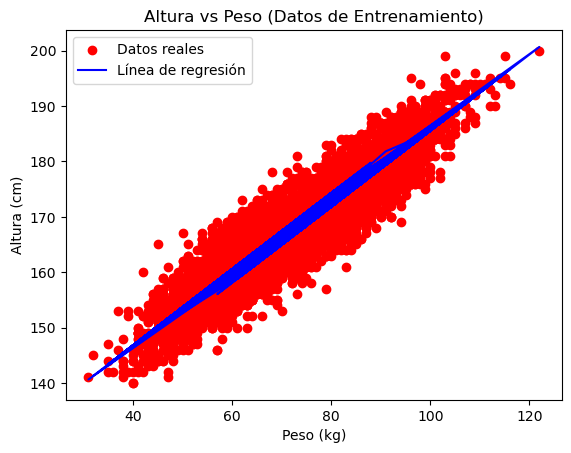

In [24]:
# Predicción con nuevos valores
peso_1 = 90  # Peso en kg
sexo_1 = 1   # Mujer
peso_2 = 53  # Peso en kg
sexo_2 = 0   # Hombre
predicciones = regressor.predict([[sexo_1, peso_1], [sexo_2, peso_2]])
print("Predicción para persona 1:", predicciones[0])
print("Predicción para persona 2:", predicciones[1])

# Visualización: Relación Peso vs Altura
plt.scatter(X_train[:, 1], y_train, color='red', label="Datos reales")
plt.plot(X_train[:, 1], regressor.predict(X_train), color='blue', label="Línea de regresión")
plt.title('Altura vs Peso (Datos de Entrenamiento)')
plt.xlabel('Peso (kg)')
plt.ylabel('Altura (cm)')
plt.legend()
plt.show()